                               SARIMAX Results                                
Dep. Variable:            Harga Beras   No. Observations:                  678
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3631.389
Date:                Fri, 10 May 2024   AIC                           7274.777
Time:                        04:20:18   BIC                           7301.883
Sample:                             0   HQIC                          7285.272
                                - 678                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4202      0.009    -48.905      0.000      -0.437      -0.403
ar.L2         -0.0960      0.017     -5.647      0.000      -0.129      -0.063
ar.L3          0.0573      0.029      2.008      0.0

/var/folders/3s/37cdhq1x7fdcds5p4y_vnbp00000gn/T/ipykernel_45616/2089364368.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv("https://raw.githubusercontent.com/Danazzz/beras-scm/main/csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-pack

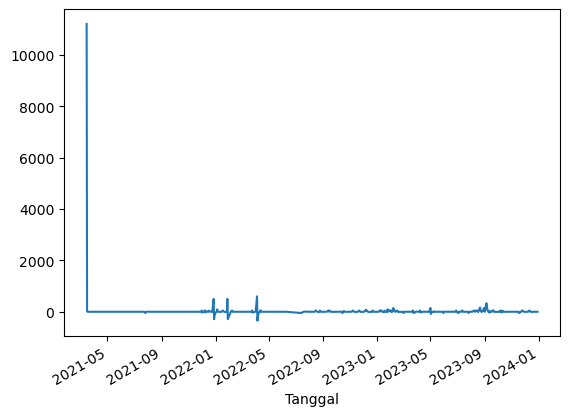

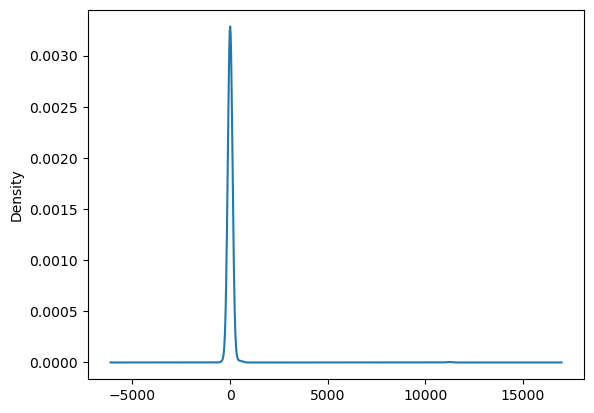

count      678.000000
mean        21.656711
std        432.998685
min       -347.872301
25%          0.000000
50%          0.000000
75%          0.000000
max      11200.000000
dtype: float64


In [14]:
from datetime import datetime
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load your dataset here
dataset = read_csv("https://raw.githubusercontent.com/Danazzz/beras-scm/main/csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)

# Select the 'Harga Beras' column for analysis
series = dataset['Harga Beras']

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = model_fit.resid
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

# summary stats of residuals
print(residuals.describe())


/var/folders/3s/37cdhq1x7fdcds5p4y_vnbp00000gn/T/ipykernel_45616/3572909100.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv("https://raw.githubusercontent.com/Danazzz/beras-scm/main/csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)


predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12450.000000
predicted=12417.124303, expected=12450.000000
predicted=12430.782544, expected=12450.000000
predicted=12439.020723, expected=12400.000000
predicted=12427.195980, expected=12400.000000
predicted=12417.062880, expected=12400.000000
predicted=12411.100175, expected=12400.000000
predicted=12405.671186, expected=12400.000000
predicted=12402.169891, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12450.000000
predicted=12417.249943, expected=12450.000000
predicted=12430.879967, expected=12450.000000
predicted=12438.995942, expected=12450.000000
predicted=12444.393671, expected=12450.000000
predicted=12447.860916, expected=12450.000000
predicted=12450.000000, expected=1

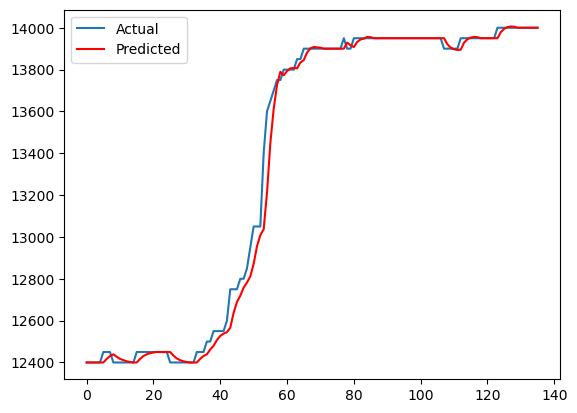

In [3]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load your dataset here
dataset = read_csv("https://raw.githubusercontent.com/Danazzz/beras-scm/main/csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)

# Select the 'Harga Beras' column for analysis
series = dataset['Harga Beras']

# split into train and test sets
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(dataset[-len(predictions):]["Harga Beras"], predictions))
mae = mean_absolute_error(dataset[-len(predictions):]["Harga Beras"], predictions)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

# R Square
r = r2_score(dataset[-len(predictions):]["Harga Beras"], predictions)

# Mean Square Error
mse = mean_squared_error(dataset[-len(predictions):]["Harga Beras"], predictions)

# Menampilkan hasil
print("R Square: {:.4f}".format(r))
print("Mean Square Error:", mse)

Root Mean Square Error: 61.52479799008498
Mean Absolute Error: 26.476380634917593
R Square: 0.9921
Mean Square Error: 3785.3007677207643
